# Приоритизация гипотез и A/B-тест в интернет-магазине

Загрузим библиотеки, которые понадобятся для работы с данными:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st 
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',  None)

Загрузим данные о гипотезах по увеличению выручки интернет-магазина и посмотрим на них:

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Все гипотезы звучат разумно, поэтому чтобы понять, какую проверять в первую очередь, воспользуемся фреймворками ICE и RICE - одними из самых популярных способов приоритизации задач. Как раз для их расчёта в таблице есть 4 параметра:
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### <a name="3"> Приоритизация с помощью фреймворков ICE и RICE </a>

Рассчитаем для каждой гипотезы значения ICE и RICE, воспользуемся следующими формулами:

$$ICE = \frac{Impact * Confidence}{Efforts}$$ 

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

Рассчитанные значения ICE и RICE добавим в таблицу hypothesis:

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] \
                    / hypothesis['Efforts']
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Отсортируем таблицу по значению ICE, от большего к меньшему. Посмотрим на порядок приоритетности гипотез согласно этому фреймворку. Затем сделаем то же самое для RICE:

In [4]:
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Теперь отсортируем таблицу по значению RICE. Посмотрим на порядок приоритетности гипотез согласно этому фреймворку:

In [5]:
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


По результатам A/B-теста выбранной гипотезы были получены результаты, которые описаны в таблицах orders и visitors. 

Загрузим таблицу orders:

In [6]:
orders = pd.read_csv('orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица orders содержит следующие столбцы:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Проверим типы данных и наличие пропусков:

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 1197 строк, пропусков нет. Тип данных в столбце date правильнее привести к типу datetime. Сделаем это на этапе предобработки данных.

Проверим интервал времени, когда были сделаны заказы:

In [8]:
orders['date'].min(), orders['date'].max()

('2019-08-01', '2019-08-31')

Теперь загрузим таблицу visitors:

In [9]:
visitors = pd.read_csv('visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица visitors содержит следующие столбцы:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Проверим типы данных и наличие пропусков:

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 62 строки, пропусков нет. Тип данных в столбце date правильнее привести к типу datetime. Сделаем это на этапе предобработки данных.

Проверим интервал времени, когда проходил A/B-тест:

In [11]:
visitors['date'].min(), visitors['date'].max()

('2019-08-01', '2019-08-31')

По итогам ознакомления с данными в таблицах orders и visitors можно сделать следующие выводы:
- данные предоставлены за период с 1 по 31 августа 2019 года;
- в таблице orders 1197 строк - столько было сделано заказов (при условии, что в таблице нет дублей);
- в таблице visitors 62 строки - это говорит о том, что у нас есть записи для каждой группы (A и B) в каждый день августа (2 * 31 = 62) при условии, что в таблице нет дублей и пропусков дат или других проблем;
- данные о времени в столбцах date обеих таблиц правильнее изменить с типа object на тип datetime. Это оптимизирует занятую память и позволит комфортнее работать с датами при необходимости.

Заменим тип данных в столбцах date таблиц orders и visitors с object на datetime:

In [12]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Проверим, что тип данных поменялся:

In [13]:
orders['date'].dtype, visitors['date'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

Всё верно: тип <M8[ns] является разновидностью типа времени datetime:

In [14]:
type('<M8[ns]') == type('datetime64[ns]')

True

Проверим, действительно ли в столбцах date есть все дни августа (31 день):

In [15]:
orders['date'].nunique(), visitors['date'].nunique()

(31, 31)

Теперь проверим таблицы orders и visitors на наличие дубликатов:

In [16]:
orders.duplicated().sum(), visitors.duplicated().sum()

(0, 0)

Полных дубликатов нет. Проверим, есть ли дубли id заказов в orders:

In [17]:
orders['transactionId'].duplicated().sum()

0

Дублей в таблицах нет.

По результатам предобработки данных:
- был изменён тип данных в столбцах date обеих таблиц с типа object на тип datetime;
- проверили, что в столбцах date обеих таблиц нет пропусков дней августа, есть все 31 день;
- проверили таблицы на наличие дублей: их нет.

Посмотрим, насколько однородно трафик "лился" по группам A и B. Не было ли дней с перекосом трафика в сторону одной из групп. Насколько равны группы по объёму.

Сравним общее количество посетителей в группе A и B:

In [18]:
visitors_A = visitors.query('group == "A"')['visitors'].sum()
visitors_B = visitors.query('group == "B"')['visitors'].sum()
visitors_A, visitors_B

(18736, 18916)

Проверим, как посетители попадали в группы в зависимости от дня месяца. Важно, чтобы не получилось так, что в одни дни больше посетителей попадало в одну группу, а в другие дни - в другую группу. Например, если в одной из групп будет больше "выходных" посетителей, то это может оказать влияние на конверсию или средний чек.

Развернём таблицу visitors так, чтобы индексами были даты, в столбцах - названия групп, а в ячейках - количество посетителей:

In [19]:
daily_traffic = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean')
daily_traffic.head()

group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707


Построим линейный график дневного трафика для групп A и B:

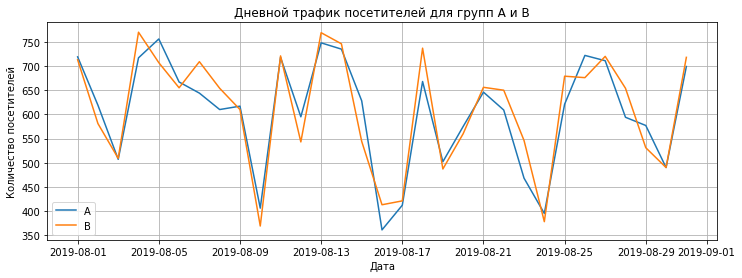

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(daily_traffic['A'], label='A')
plt.plot(daily_traffic['B'], label='B')
plt.legend()
plt.grid()
plt.title("Дневной трафик посетителей для групп A и B")
plt.xlabel("Дата")
plt.ylabel("Количество посетителей")
plt.show() 

Трафик "льётся" однородно: кривые идут близко одна к другой. 

In [21]:
temp = orders.groupby(['visitorId','group']).count().reset_index()
temp['group'].value_counts()

B    586
A    503
Name: group, dtype: int64

Видим, что в группе B больше покупателей. Посчитаем, насколько группа B больше группы A:

In [22]:
(temp['group'].value_counts()[0] - temp['group'].value_counts()[1]) / temp['group'].value_counts()[1]

0.16500994035785288

Группа B больше на 16,5%. 

In [23]:
groups_by_visitors = orders.groupby('visitorId')['group'].nunique()
incorrect_visitors = groups_by_visitors[groups_by_visitors > 1]
len(incorrect_visitors)

58

In [24]:
new_orders = orders.query('visitorId not in @incorrect_visitors.index')
new_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [25]:
temp = new_orders.groupby(['visitorId','group'])[['transactionId']].count().reset_index()
temp['group'].value_counts()

B    528
A    445
Name: group, dtype: int64

В группе B по-прежнему больше покупателей. Посчитаем различие:

In [26]:
(temp['group'].value_counts()[0] - temp['group'].value_counts()[1]) / temp['group'].value_counts()[1]

0.18651685393258427

In [27]:
orders_by_visitors = new_orders.groupby('visitorId')['transactionId'].nunique()
orders_by_visitors.sort_values(ascending=False)

visitorId
3967698036    3
249864742     3
2108163459    3
2988190573    3
3908431265    3
             ..
1438226485    1
1452540367    1
1455323168    1
1455861274    1
4283872382    1
Name: transactionId, Length: 973, dtype: int64

В таблице 973 покупателя. Есть такие, которые сделали по 3 заказа. Посмотрим на распределение количества заказов:

In [28]:
orders_by_visitors.describe()

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: transactionId, dtype: float64

Среднее значение - около 1 заказа, медианное - 1 заказ. Не менее 75% покупателей делают лишь 1 заказ.

Построим гистограмму:

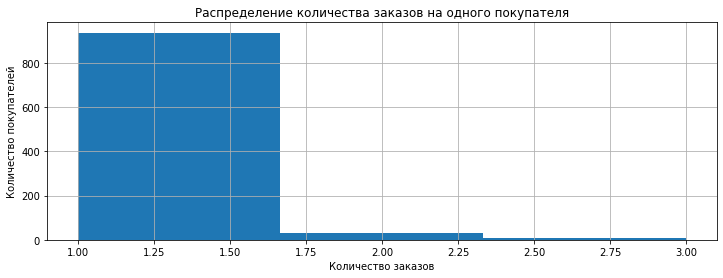

In [29]:
plt.figure(figsize=(12, 4))
plt.hist(orders_by_visitors, bins=3)
plt.grid()
plt.title("Распределение количества заказов на одного покупателя")
plt.xlabel("Количество заказов")
plt.ylabel("Количество покупателей")
plt.show() 

Видно, что лишь небольшое количество покупателей делают 2 и 3 заказа. 

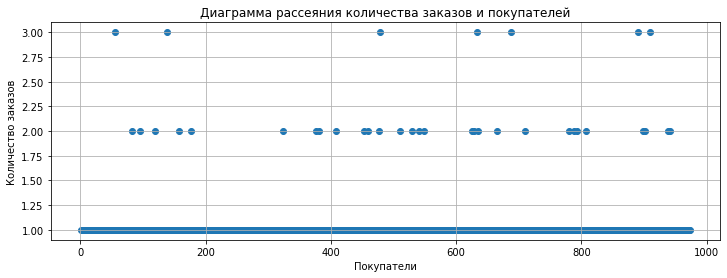

In [30]:
x_values = pd.Series(range(1, len(orders_by_visitors) + 1))
plt.figure(figsize=(12, 4))
plt.scatter(x_values, orders_by_visitors) 
plt.grid()
plt.title("Диаграмма рассеяния количества заказов и покупателей")
plt.xlabel("Покупатели")
plt.ylabel("Количество заказов")
plt.show() 

In [31]:
outlier_visitors = orders_by_visitors[orders_by_visitors > 2].index
outlier_visitors

Int64Index([ 249864742,  611059232, 2108163459, 2742574263, 2988190573,
            3908431265, 3967698036],
           dtype='int64', name='visitorId')

Для проверки, найдём 95 и 99 процентили:

In [32]:
np.percentile(orders_by_visitors, [95, 99])

array([1., 2.])

In [33]:
new_orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

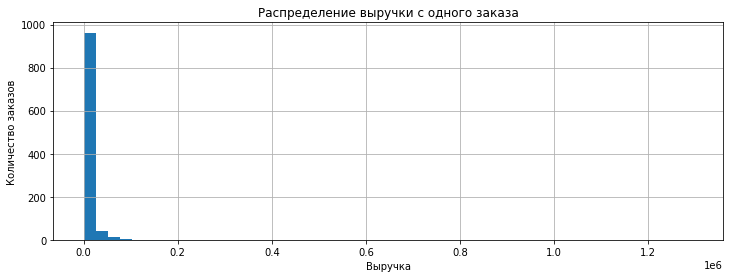

In [34]:
plt.figure(figsize=(12, 4))
plt.hist(new_orders['revenue'], bins=50)
plt.grid()
plt.title("Распределение выручки с одного заказа")
plt.xlabel("Выручка")
plt.ylabel("Количество заказов")
plt.show()

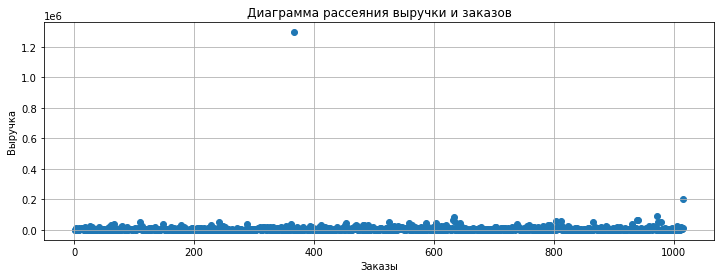

In [35]:
x_values = pd.Series(range(1, len(new_orders) + 1))
plt.figure(figsize=(12, 4))
plt.scatter(x_values, new_orders['revenue']) 
plt.grid()
plt.title("Диаграмма рассеяния выручки и заказов")
plt.xlabel("Заказы")
plt.ylabel("Выручка")
plt.show() 

In [36]:
np.percentile(new_orders['revenue'], [95, 99])

array([26785., 53904.])

Посмотрим на топ-5 выбросов:

In [37]:
new_orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
1136      92550
744       86620
743       67990
Name: revenue, dtype: int64

In [38]:
new_orders_filtered = new_orders.query('revenue <= 100000')

Посмотрим, как изменилось количество заказов:

In [39]:
len(new_orders), len(new_orders_filtered)

(1016, 1014)

In [40]:
revenue_by_date = new_orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum')
revenue_by_date.head()

group,A,B
date,,
2019-08-01,142779,59758
2019-08-02,91602,162043
2019-08-03,112473,67049
2019-08-04,41176,96890
2019-08-05,86383,89908


In [41]:
revenue_cum = revenue_by_date.cumsum(axis=0)
revenue_cum.tail()

group,A,B
date,,
2019-08-27,2940471,4579312
2019-08-28,3036933,4640510
2019-08-29,3233233,4746610
2019-08-30,3311413,4955833
2019-08-31,3364656,5068972


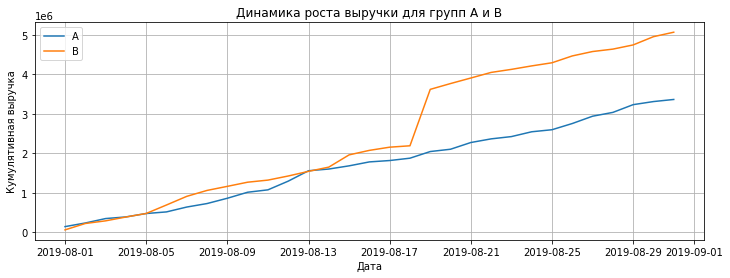

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(revenue_cum['A'], label='A')
plt.plot(revenue_cum['B'], label='B')
plt.legend()
plt.title("Динамика роста выручки для групп A и B")
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка") 
plt.grid()
plt.show()

In [43]:
new_orders.query('date == "2019-08-19" and revenue > 1000000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


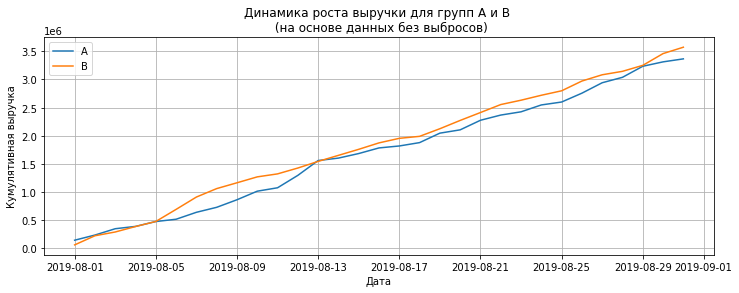

In [44]:
revenue_cum_filtered = new_orders_filtered.pivot_table(index='date', columns='group', 
                                                       values='revenue', aggfunc='sum').cumsum(axis=0)
plt.figure(figsize=(12, 4))
plt.plot(revenue_cum_filtered['A'], label='A')
plt.plot(revenue_cum_filtered['B'], label='B')
plt.legend()
plt.title("Динамика роста выручки для групп A и B \n (на основе данных без выбросов)")
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка") 
plt.grid()
plt.show()

In [45]:
(revenue_cum['B'][-1] - revenue_cum['A'][-1]) / revenue_cum['A'][-1]

0.5065349919872938

In [46]:
(revenue_cum_filtered['B'][-1] - revenue_cum_filtered['A'][-1]) / revenue_cum_filtered['A'][-1]

0.06154447884122478

In [47]:
orders_cum = new_orders.pivot_table(index='date', columns='group',
                                    values='transactionId', aggfunc='nunique').cumsum(axis=0)
orders_cum.head()

group,A,B
date,,
2019-08-01,23,17
2019-08-02,42,40
2019-08-03,66,54
2019-08-04,77,68
2019-08-05,99,89


In [48]:
average_check_cum = revenue_cum / orders_cum
average_check_cum.tail()

group,A,B
date,,
2019-08-27,7017.830549,9681.420719
2019-08-28,6997.541475,9374.767677
2019-08-29,7169.031042,9307.078431
2019-08-30,7198.723913,9333.018832
2019-08-31,7189.435897,9249.948905


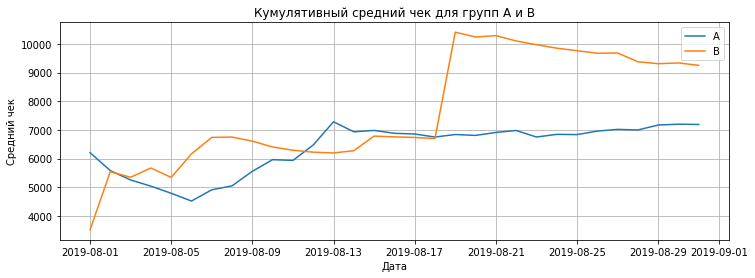

In [49]:
plt.figure(figsize=(12, 4))
plt.plot(average_check_cum['A'], label='A')
plt.plot(average_check_cum['B'], label='B')
plt.legend()
plt.title("Кумулятивный средний чек для групп A и B")
plt.xlabel("Дата")
plt.ylabel("Средний чек") 
plt.grid()
plt.show()

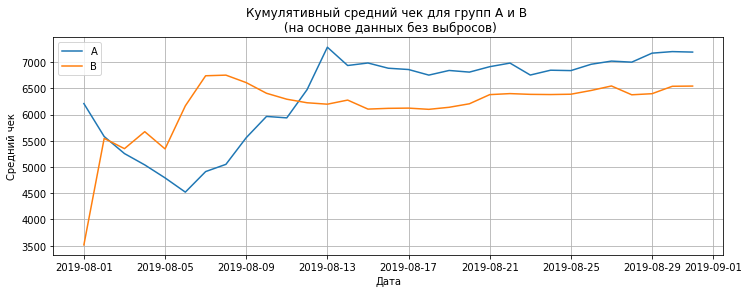

In [50]:
orders_cum_filtered = new_orders_filtered.pivot_table(index='date', columns='group',
                                    values='transactionId', aggfunc='nunique').cumsum(axis=0)
average_check_cum_filtered = revenue_cum_filtered / orders_cum_filtered
plt.figure(figsize=(12, 4))
plt.plot(average_check_cum_filtered['A'], label='A')
plt.plot(average_check_cum_filtered['B'], label='B')
plt.legend()
plt.title("Кумулятивный средний чек для групп A и B \n (на основе данных без выбросов)")
plt.xlabel("Дата")
plt.ylabel("Средний чек") 
plt.grid()
plt.show()

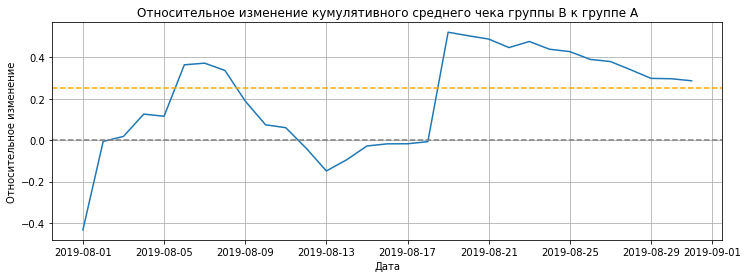

In [51]:
average_check_cum['diff'] = (average_check_cum['B'] - average_check_cum['A']) \
                            / average_check_cum['A']
plt.figure(figsize=(12, 4))
plt.plot(average_check_cum['diff'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=.25, color='orange', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение") 
plt.grid()
plt.show()

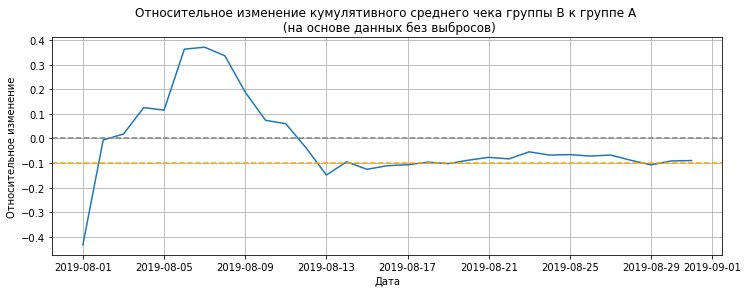

In [52]:
average_check_cum_filtered['diff'] = (average_check_cum_filtered['B'] - 
                                      average_check_cum_filtered['A']) / average_check_cum_filtered['A']
plt.figure(figsize=(12, 4))
plt.plot(average_check_cum_filtered['diff'])
plt.axhline(y=0, color='grey', linestyle='--') 
plt.axhline(y=-.1, color='orange', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A \n (на основе данных без выбросов)")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение") 
plt.grid()
plt.show()

In [53]:
alpha = .05

In [54]:
orders_A = new_orders.query('group == "A"')['revenue'] # выборка по "сырым" данным
orders_B = new_orders.query('group == "B"')['revenue'] # выборка по "сырым" данным
orders_A_filtered = new_orders_filtered.query('group == "A"')['revenue'] # выборка по "очищенным" данным
orders_B_filtered = new_orders_filtered.query('group == "B"')['revenue'] # выборка по "очищенным" данным

In [55]:
results = st.mannwhitneyu(orders_A, orders_B, alternative='two-sided')
p_value = results.pvalue
results_filtered = st.mannwhitneyu(orders_A_filtered, orders_B_filtered, alternative='two-sided')
p_value_filtered = results_filtered.pvalue

In [56]:
def conclusion_by(pvalue, по_каким_данным):
    print(f'Результат проверки по {по_каким_данным} данным:')
    print('P-уровень значимости составил {:.2f}.'.format(pvalue), end=' ')
    if pvalue < alpha:
        print(f'Это меньше критического значения альфа, равного {alpha}.\nПоэтому отвергаем нулевую гипотезу. Различие является \
статистически значимым.')
    else:
        print(f'Это больше критического значения альфа, равного {alpha}.\nПоэтому нет достаточных оснований отвергнуть \
нулевую гипотезу. Статистическая значимость различий не доказана.')   

In [57]:
conclusion_by(p_value, 'сырым')

Результат проверки по сырым данным:
P-уровень значимости составил 0.83. Это больше критического значения альфа, равного 0.05.
Поэтому нет достаточных оснований отвергнуть нулевую гипотезу. Статистическая значимость различий не доказана.


In [58]:
conclusion_by(p_value_filtered, 'очищенным')

Результат проверки по очищенным данным:
P-уровень значимости составил 0.75. Это больше критического значения альфа, равного 0.05.
Поэтому нет достаточных оснований отвергнуть нулевую гипотезу. Статистическая значимость различий не доказана.


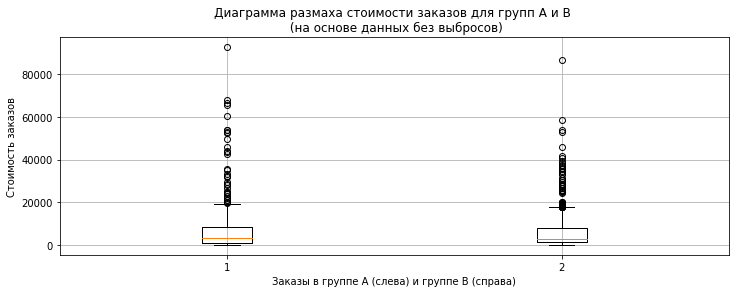

In [59]:
plt.figure(figsize=(12, 4))
plt.boxplot([orders_A_filtered, orders_B_filtered])
plt.title("Диаграмма размаха стоимости заказов для групп A и B \n (на основе данных без выбросов)")
plt.xlabel("Заказы в группе A (слева) и группе B (справа)")
plt.ylabel("Стоимость заказов") 
plt.grid()
plt.show()

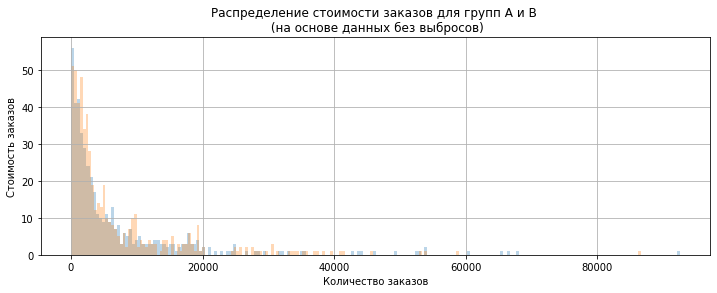

In [60]:
plt.figure(figsize=(12, 4))
plt.hist(orders_A_filtered, alpha=.3, bins=200)
plt.hist(orders_B_filtered, alpha=.3, bins=200)
plt.title("Распределение стоимости заказов для групп A и B \n (на основе данных без выбросов)")
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказов") 
plt.grid()
plt.show()

In [61]:
visitors_cum = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean')\
            .cumsum(axis=0)
visitors_cum.head()

group,A,B
date,,
2019-08-01,719,713
2019-08-02,1338,1294
2019-08-03,1845,1803
2019-08-04,2562,2573
2019-08-05,3318,3280


In [62]:
convertion = orders_cum / visitors_cum
convertion.tail()

group,A,B
date,,
2019-08-27,0.025586,0.028627
2019-08-28,0.025575,0.028818
2019-08-29,0.025702,0.028801
2019-08-30,0.025503,0.029179
2019-08-31,0.024979,0.028970


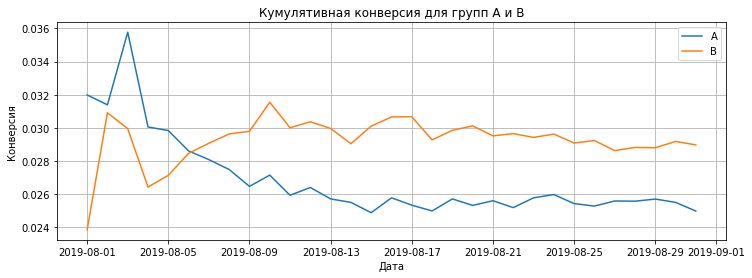

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(convertion['A'], label='A')
plt.plot(convertion['B'], label='B')
plt.legend()
plt.title("Кумулятивная конверсия для групп A и B")
plt.xlabel("Дата")
plt.ylabel("Конверсия") 
plt.grid()
plt.show()

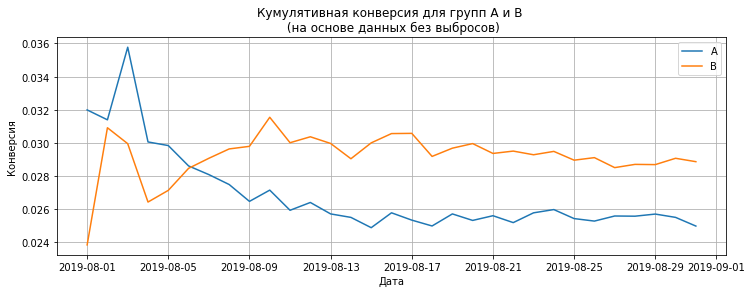

In [64]:
convertion_filtered = orders_cum_filtered / visitors_cum
plt.figure(figsize=(12, 4))
plt.plot(convertion_filtered['A'], label='A')
plt.plot(convertion_filtered['B'], label='B')
plt.legend()
plt.title("Кумулятивная конверсия для групп A и B \n (на основе данных без выбросов)")
plt.xlabel("Дата")
plt.ylabel("Конверсия") 
plt.grid()
plt.show()

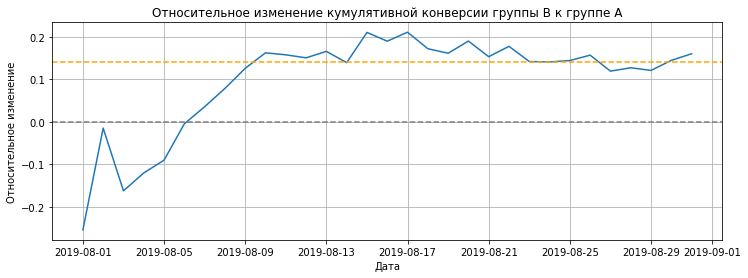

In [65]:
convertion['diff'] = (convertion['B'] - convertion['A']) / convertion['A']
plt.figure(figsize=(12, 4))
plt.plot(convertion['diff'])
plt.axhline(y=0, color='grey', linestyle='--') 
plt.axhline(y=.14, color='orange', linestyle='--') 
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение") 
plt.grid()
plt.show()

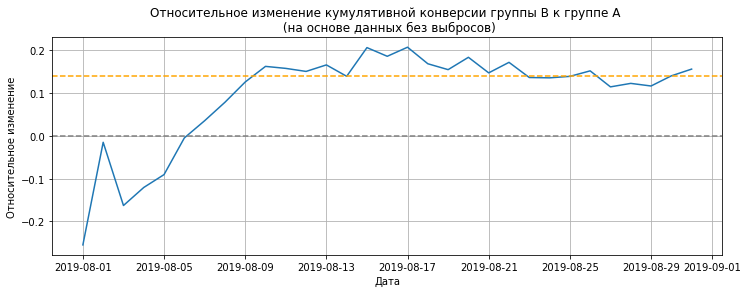

In [66]:
convertion_filtered['diff'] = (convertion_filtered['B'] - convertion_filtered['A']) \
                             / convertion_filtered['A']
plt.figure(figsize=(12, 4))
plt.plot(convertion_filtered['diff'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=.14, color='orange', linestyle='--') 
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A \n (на основе данных без выбросов)")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение") 
plt.grid()
plt.show()

In [68]:
def find_pvalue(convertion_type, orders_cum_type):
    p_A = convertion_type['A'][-1] # посчитаем конверсию в группе A 
    p_B = convertion_type['B'][-1] # посчитаем конверсию в группе B 
    n_A = visitors_cum['A'][-1] # посчитаем количество посетителей в группе A 
    n_B = visitors_cum['B'][-1] # посчитаем количество посетителей в группе B
    p = (orders_cum_type['A'][-1] + orders_cum_type['B'][-1]) / (n_A + n_B) # посчитаем общую конверсию для обеих групп
    z_value = (p_A - p_B) / (p * (1 - p) * (1 / n_A + 1 / n_B))**.5 # найдём z-значение
    distr = st.norm(0, 1) # зададим стандартное нормальное распределение \
    p_value = (1 - distr.cdf(abs(z_value))) * 2 # рассчитаем вероятность получить отклонение равное z-значению
    return p_value

In [69]:
p_value = find_pvalue(convertion, orders_cum) # для "сырых" данных
p_value_filtered = find_pvalue(convertion_filtered, orders_cum_filtered) # для "очищенных" данных

Воспользуемся написанной ранее функцией conclusion_by, которая выдаст результат проверки для разных типов данных:

In [70]:
conclusion_by(p_value, 'сырым')

Результат проверки по сырым данным:
P-уровень значимости составил 0.02. Это меньше критического значения альфа, равного 0.05.
Поэтому отвергаем нулевую гипотезу. Различие является статистически значимым.


In [71]:
conclusion_by(p_value_filtered, 'очищенным')

Результат проверки по очищенным данным:
P-уровень значимости составил 0.02. Это меньше критического значения альфа, равного 0.05.
Поэтому отвергаем нулевую гипотезу. Различие является статистически значимым.


In [72]:
count = [orders_cum_filtered['A'][-1], orders_cum_filtered['B'][-1]]
nobs = [visitors_cum['A'][-1], visitors_cum['B'][-1]]
p_value_filtered_2 = proportions_ztest(count, nobs)[1]
conclusion_by(p_value_filtered, 'очищенным')

Результат проверки по очищенным данным:
P-уровень значимости составил 0.02. Это меньше критического значения альфа, равного 0.05.
Поэтому отвергаем нулевую гипотезу. Различие является статистически значимым.


Результат совпадает.